# Vader with stopword cleaning

In [5]:
import pandas as pd # for data processing
import matplotlib.pyplot as plt # to create stat and visualize data
import matplotlib as mpl # to visualize data
import seaborn as sns # to visualize data
from sklearn.metrics import * # calculation of metrics for validation purposes 
import nltk # importing nltk            
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # importing vader classifier

setting to show full text content

In [6]:
pd.set_option('display.max_colwidth', None)

## Loading data

In [7]:
df_vader_without_stopwords = pd.read_csv('../../Data-Preparation/sentiment140/traindata_without_stopwords_preprocessed.csv')

In [8]:
df_vader_without_stopwords['Text'].apply(type).value_counts()

Text
<class 'str'>      967917
<class 'float'>      4883
Name: count, dtype: int64

In [9]:
df_vader_without_stopwords['Text'] = df_vader_without_stopwords['Text'].astype(str)


df_vader_without_stopwords['Text'] = df_vader_without_stopwords['Text'].astype(str)

In [10]:
df_vader_without_stopwords

,Text,Ground_Truth_Label,target
0,wow wise fear elevators incredible love demi,negative,0
1,hahaha bored haha plane crash scary,negative,0
2,Sure following,positive,4
3,itunes say download OS3 yet mine says OS date,negative,0
4,French Mauritian speak French Good luck learning,negative,0
...,...,...,...
972795,asked 400 staff ACC bring cd back get signed said Please Please sign cd,negative,0
972796,love sucker romantic comedy harry met sally favorite movie,positive,4
972797,thx props amp u new listener â«,positive,4
972798,yesterday quot sonny chance quot came brazil loved amazing lt 33 please reply,negative,0


## Classifying sentiments 

SentimentIntensityAnalyzer gets imported that containes a pre-defined ruleset for sentiment analyzation. A sentiment score gets calculated from that and the value 0.00 is chosen to differ between positive and negative sentiment.

In [11]:
analyzer = SentimentIntensityAnalyzer()

In [12]:
def classify_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.00:
        return 'positive'
    else: 
        return 'negative'

In [13]:
df_vader_without_stopwords['VADER_Classification'] = df_vader_without_stopwords['Text'].apply(classify_sentiment)

In [14]:
df_vader_without_stopwords

,Text,Ground_Truth_Label,target,VADER_Classification
0,wow wise fear elevators incredible love demi,negative,0,positive
1,hahaha bored haha plane crash scary,negative,0,negative
2,Sure following,positive,4,positive
3,itunes say download OS3 yet mine says OS date,negative,0,positive
4,French Mauritian speak French Good luck learning,negative,0,positive
...,...,...,...,...
972795,asked 400 staff ACC bring cd back get signed said Please Please sign cd,negative,0,positive
972796,love sucker romantic comedy harry met sally favorite movie,positive,4,positive
972797,thx props amp u new listener â«,positive,4,positive
972798,yesterday quot sonny chance quot came brazil loved amazing lt 33 please reply,negative,0,positive


## Testing quality of the classifier on training data

In [15]:
accuracy = accuracy_score(df_vader_without_stopwords['Ground_Truth_Label'], df_vader_without_stopwords['VADER_Classification'])
precision = precision_score(df_vader_without_stopwords['Ground_Truth_Label'], df_vader_without_stopwords['VADER_Classification'], pos_label='positive')
recall = recall_score(df_vader_without_stopwords['Ground_Truth_Label'], df_vader_without_stopwords['VADER_Classification'], pos_label='positive')
f1 = f1_score(df_vader_without_stopwords['Ground_Truth_Label'], df_vader_without_stopwords['VADER_Classification'], pos_label='positive')

beta = 1 / (2**0.5)
f_beta = fbeta_score(df_vader_without_stopwords['Ground_Truth_Label'], df_vader_without_stopwords['VADER_Classification'],beta=beta, pos_label='positive')


In [16]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print(f"F-beta Score (beta={beta}): {f_beta}")

Accuracy: 0.64
Precision: 0.59
Recall: 0.91
F1 Score: 0.72
F-beta Score (beta=0.7071067811865475): 0.67037256781221


In [17]:
print("\nClassification Report:\n")
print(classification_report(df_vader_without_stopwords['Ground_Truth_Label'], df_vader_without_stopwords['VADER_Classification'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.80      0.38      0.51    486400
    positive       0.59      0.91      0.72    486400

    accuracy                           0.64    972800
   macro avg       0.70      0.64      0.62    972800
weighted avg       0.70      0.64      0.62    972800



creating heatmap to visualize false positives and false negatives

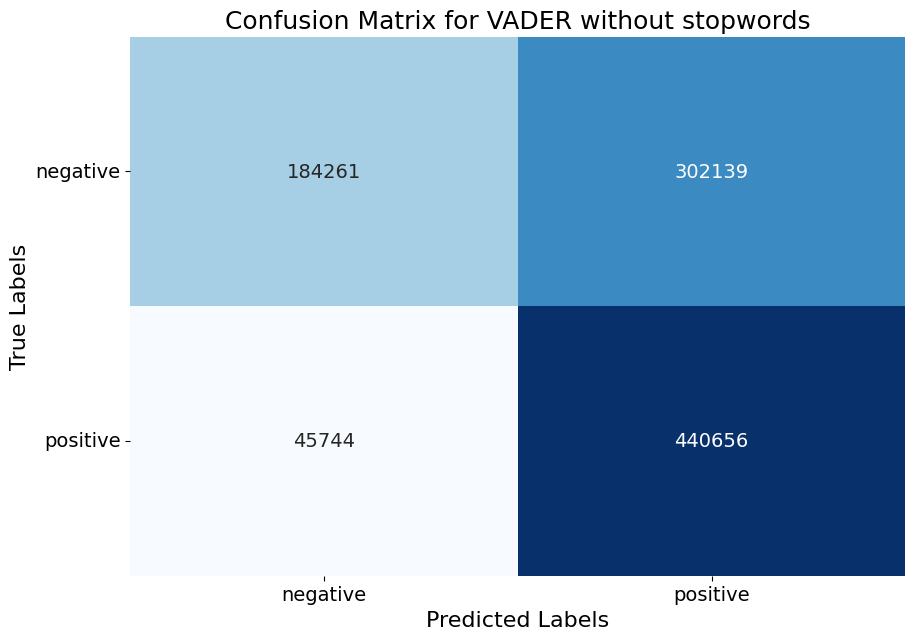

In [18]:
cm_nb = confusion_matrix(df_vader_without_stopwords['Ground_Truth_Label'], df_vader_without_stopwords['VADER_Classification'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for VADER without stopwords', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()